# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [1]:
# Importer resten av pakkene du trenger her:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

In [3]:
#TODO: visualiser y_train og y_test i et histogram

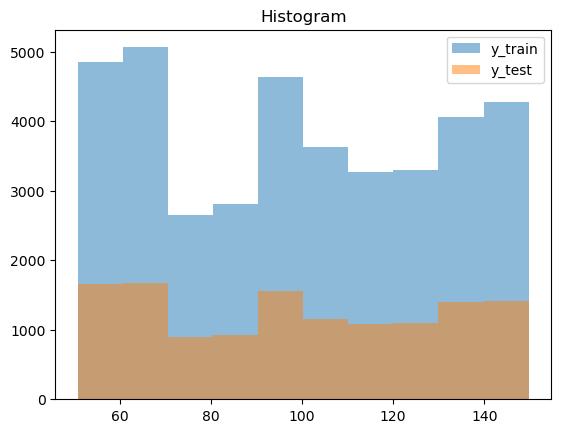

In [4]:
plt.hist(y_train, bins=10, alpha=0.5, label='y_train')
plt.hist(y_test, bins=10, alpha=0.5, label='y_test')

plt.title('Histogram')
plt.legend()
plt.show()

## Man ser ut i fra historgrammet at Trenings settet er likt test settet bare at det er skallert

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

def korrelasjonsmatrise(X,y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp["Target"] = y_temp
    #TODO: Fullfør koden
    ...

In [5]:
def korrelasjonsmatrise(X, y):
    X_temp = X.copy()
    y_temp = y.copy()

    X_temp["Target"] = y_temp

    correlation_matrix = X_temp.corr()

    plt.figure(figsize=(8, 6))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)))
    plt.title('Korrelasjonsmatrise')
    plt.show()



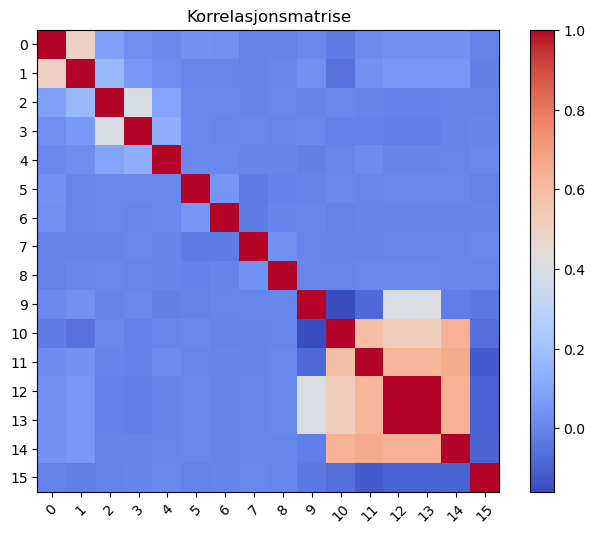

In [6]:
korrelasjonsmatrise(X_train,y_train)

**Svar:**

*<Det ser ut til at korelasjonen mellom variablene er sterk særlig i x akse spekteret 9 - 14 >*

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [7]:
#TODO: Utfør hyperparametersøk for en modell

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import numpy as np

param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],
    'lasso__alpha': [0.01, 0.1, 1],
    'lasso__max_iter': [100, 1000, 10000]
}

model = make_pipeline(
    PolynomialFeatures(),
    Lasso()
)

grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=KFold(n_splits=3),
    scoring='neg_mean_squared_error'
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_val_hat = best_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_hat)
mae = mean_absolute_error(y_val, y_val_hat)
r2 = r2_score(y_val, y_val_hat)

print("Best Model Parameters:", best_model.get_params())
print("Best Model MSE:", mse)
print("Best Model MAE:", mae)
print("Best Model R^2:", r2)


C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e+07, tolerance: 2.310e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+07, tolerance: 2.298e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+07, toler

C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+07, tolerance: 2.310e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.030e+07, tolerance: 2.298e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+07, toler

C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+07, tolerance: 2.310e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.047e+07, tolerance: 2.298e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+07, toler

C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+07, tolerance: 2.310e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+07, tolerance: 2.298e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\herma\miniconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+07, toler

**Svar:**

*< ditt tekstsvar her >*

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [7]:
#TODO: Utfør kryssvalidering med de optimale parameterene fra forrige oppgave og logg mean_absolute_error og mean_squared_error

In [8]:
#TODO: Beregn gjennomsnitt og standard avvik for mean_absolute_error og mean_squared_error og beregn hvor stor den 
# gjennomsnittlige feilen er i forhold til den gjennomsnittlige prisen for markedskampanjen (target) i prosent

**Svar:**

*< ditt tekstsvar her >*

#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [9]:
#TODO: Tren modellen på alle treningsdata og utfør prediksjon på testdataene

**Svar:**

*< ditt tekstsvar her >*